In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso



data=pd.read_csv("GercekZamanliTuketim-01012016-01122020.csv", encoding ="ISO-8859-1")
data=data.apply(lambda x: x.str.replace('.',''))
data=data.apply(lambda x: x.str.replace(',','.'))
data['Tüketim Miktarý (MWh)'] = data['Tüketim Miktarý (MWh)'].astype(float)
data.insert(0,'Index',range(0,len(data)))


##Lag_168
lag_168_index=data[168:]['Index']-168
lag_168=data[data['Index'].isin(lag_168_index)]['Tüketim Miktarý (MWh)']


##Lag_48
lag_48_index=data[168:]['Index']-48
lag_48=data[data['Index'].isin(lag_48_index)]['Tüketim Miktarý (MWh)'].to_frame()
lag_48.reset_index(inplace = True)

column_names = ["Date", "Hour", "Lag_48","Lag_168"]
df = pd.DataFrame(columns = column_names)
df['Date']=data.iloc[168:,1]
df['Hour']=data.iloc[168:,2]
df['Hour']=data.iloc[168:,2]
df['Consumption']=data.iloc[168:,3]
df.reset_index(inplace = True) 
df['Lag_168']=lag_168
df['Lag_48']=lag_48.loc[:,'Tüketim Miktarý (MWh)']

df.drop(df.loc[df['Date']=='27032016'].index, inplace=True)
df.drop(df.loc[df['Date']=='29032016'].index, inplace=True)
df.drop(df.loc[df['Date']=='03042016'].index, inplace=True)

I took the data which is in the long format.

In [3]:
train_data=df.iloc[0:42144,:]
test_data=df.iloc[42144:,:]

Then I splitted this data into the train and test data.

In [5]:
new_train_data=train_data.pivot(index='Date', columns='Hour', values=["Lag_48","Lag_168","Consumption"])
new_test_data=test_data.pivot(index='Date', columns='Hour', values=["Lag_48","Lag_168","Consumption"])
print(new_train_data)
new_test_data

            Lag_48                                                    \
Hour          0:00     10:00     11:00     12:00     13:00     14:00   
Date                                                                   
01012017  30051.36  35875.72  36443.26  35761.79  34511.97  35299.73   
01012018  31934.05  36328.96  37136.53  36290.83  36186.33  36015.28   
01012019  30535.49  30036.66  31167.88  31439.01  31595.12  31469.61   
01012020  30524.08  40249.82  40955.34  39992.85  40257.43  40675.00   
01022016  30323.74  35450.49  36294.06  35204.25  34932.17  34697.06   
...            ...       ...       ...       ...       ...       ...   
31102020  29337.75  30543.10  31322.33  30383.47  31148.96  32014.55   
31122016  31685.67  38513.30  39855.30  38915.73  39331.60  39499.16   
31122017  32393.07  38743.01  38971.53  36862.49  35729.65  37518.78   
31122018  31754.51  35614.44  36397.75  35738.76  35709.94  35654.14   
31122019  31510.17  31540.25  32997.46  33369.23  33576.44  3368

Lag_48                                                    \
Hour          0:00     10:00     11:00     12:00     13:00     14:00   
Date                                                                   
01112020  29066.51  33874.80  34388.95  32262.93  32830.42  34761.18   
01122020  32332.68  28332.10  29003.50  28748.98  29081.29  29682.72   
02112020  29835.90  31968.61  32325.42  31169.25  30663.78  32050.36   
03112020  28701.62  26118.58  26740.86  26591.08  27233.19  27785.71   
04112020  27931.36  34530.73  34792.40  33256.31  33967.69  35239.46   
05112020  31301.07  35251.33  35451.90  34191.43  35387.31  36868.67   
06112020  31278.36  36953.41  37624.94  36237.72  37090.66  37947.51   
07112020  31494.01  37328.23  37995.61  36673.18  37474.83  38465.18   
08112020  32009.92  37023.74  37426.55  35504.94  35730.20  37473.42   
09112020  32079.29  33640.77  33982.07  32961.52  33436.74  33853.06   
10112020  30770.20  25872.33  26296.87  26247.39  26979.75  27311.96   
11112020  29431.56  34719.78  34762.37  32980.67  33549.23  35004.57   
12112020  32039.71  35239.96  35383.13  33645.52  34463.58  35696.60   
13112020  32398.76  35411.64  35618.76  34000.28  34739.81  36053.33   
14112020  32363.50  35271.47  35403.36  33584.56  34366.97  35636.86   
15112020  32468.48  35447.62  35354.26  32980.12  33553.66  35534.50   
16112020  32450.53  34717.16  35131.00  34315.00  34813.13  35350.99   
17112020  31048.02  27488.11  27999.92  27963.55  28531.22  29082.54   
18112020  29921.97  36115.12  36215.12  34930.84  35562.96  36704.66   
19112020  33050.14  36641.78  36658.02  34863.45  35626.05  36604.82   
20112020  33367.10  36543.49  36760.46  35200.40  36006.68  37557.10   
21112020  33455.97  38233.15  38704.74  37415.32  38196.98  39412.98   
22112020  33651.81  39834.37  40475.03  38482.23  39003.06  40727.71   
23112020  33697.36  34969.54  35792.39  34480.23  35028.71  35312.45   
24112020  31685.68  27974.74  28525.59  28433.65  28962.66  29334.07   
25112020  30426.00  37012.71  36950.05  35296.28  35986.82  37089.41   
26112020  33520.81  37515.08  37261.41  35845.55  36583.20  37830.17   
27112020  33585.86  39507.26  39896.53  38446.53  39059.04  40148.58   
28112020  33902.71  39295.57  39312.61  37508.66  38124.78  39220.21   
29112020  33896.52  37808.82  37668.32  35381.81  35587.14  37205.46   
30112020  33935.56  35457.72  35822.08  34607.24  34962.65  35338.14   

                                                  ... Consumption            \
Hour         15:00     16:00     17:00     18:00  ...       22:00     23:00   
Date                                              ...                         
01112020  34613.09  35294.22  36420.29  36679.35  ...    30837.27  29743.71   
01122020  30568.06  32342.53  35411.15  36984.04  ...    37173.97  35725.46   
02112020  32296.09  32844.32  34156.68  35768.13  ...    34616.98  33151.95   
03112020  28210.84  29067.08  30790.72  32946.87  ...    34793.99  33281.76   
04112020  35526.07  36552.09  37959.05  38720.50  ...    35086.17  33533.38   
05112020  36997.12  38021.90  39038.66  39314.53  ...    35449.89  34053.60   
06112020  37981.78  38329.90  39271.36  39548.13  ...    35419.89  34157.70   
07112020  38696.44  39111.30  40006.89  39891.23  ...    34199.98  32808.00   
08112020  37614.03  38395.48  39456.23  39664.77  ...    32048.87  30885.94   
09112020  34011.48  34934.08  36549.26  38006.32  ...    35314.45  33838.31   
10112020  27914.76  29768.90  32450.62  34677.55  ...    35579.04  34176.40   
11112020  35458.30  37024.05  38939.01  39482.19  ...    35748.63  34327.68   
12112020  36271.37  37674.58  39588.11  39930.95  ...    35905.85  34497.57   
13112020  36466.69  37882.03  39718.50  40308.02  ...    35724.27  34360.70   
14112020  36040.27  37712.17  38810.08  40355.11  ...    34725.68  32784.78   
15112020  36199.20  37660.00  39696.79  39992.94  ...    32732.91  31167.42   
16112020  35556.45  36387.39  37810.27  38873.11  ...    36467

In order to convert the long format data into the wide format I used pivot function.

In [6]:
X_train = new_train_data[['Lag_48', 'Lag_168']]
X_test = new_test_data[['Lag_48', 'Lag_168']]

In [7]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [12]:
MAPEs={}
error_list = []
for i in range(0,24):
    y_train = new_train_data.loc[:,('Consumption', str(i)+':00')].to_frame()
    y_test = new_test_data.loc[:,('Consumption', str(i)+':00')].to_frame()
    alphas = np.logspace(-4, 1, 10)
    lassocv = linear_model.LassoCV(alphas=alphas,cv=10, random_state=0, max_iter = 2000)
    lassocv.fit(X_train, y_train)
    lassocv_score_on_train = lassocv.score(X_train, y_train)
    lassocv_score_on_test = lassocv.score(X_test, y_test)
    lassocv_alphas = lassocv.alphas_
    lassocv_alpha = lassocv.alpha_
    best_lasso = linear_model.Lasso(alpha=lassocv_alpha)
    best_lasso.fit(X_train, y_train)
    ypred=best_lasso.predict(X_test)
    error=MAPE(y_test.to_numpy(),ypred)
    y_test = y_test.to_numpy().reshape(-1)
    error=MAPE(y_test,ypred)
    error_extended = np.divide(np.abs(y_test - ypred), y_test) * 100
    error_list.append(error_extended)
    MAPEs[i]=[]
    MAPEs[i].append(error)
MAPEs

C:\Users\hande\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hande\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502877013.7410518, tolerance: 1419239.3331805067
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\hande\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498111847.5990797, tolerance: 1419239.3331805067
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\hande\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. Yo

{0: [1.4329697851001517],
 1: [1.6183236119031095],
 2: [1.5508370581121529],
 3: [1.4589452391438005],
 4: [1.54961856430531],
 5: [1.500792336552207],
 6: [1.782620981553679],
 7: [1.8497685841682048],
 8: [2.5310767913218912],
 9: [3.5842874328922374],
 10: [4.126569105151445],
 11: [4.378298105335849],
 12: [4.751751370981477],
 13: [4.605426849308966],
 14: [4.394121723512926],
 15: [3.87945344762823],
 16: [2.9629083843571316],
 17: [2.1607025288512376],
 18: [1.7379424684936424],
 19: [1.6267910400236754],
 20: [1.6809509312488198],
 21: [1.6979094273713153],
 22: [1.6396492974520949],
 23: [1.8393527822168614]}

In this approach, I wanted to train penalized regression models with L1 penalty (i.e. lasso regression) for each hour using the
same training period (24 models). So,  I filtered each hour on the wide format data and then I found y_test and y_train values. To find best alpha parameter I performed a 10-fold cross-validation. After I found the best regularization parameter I used it in Lasso model and called this model as "best_lasso". I made predictions on the test data by using the best model. Lastly, I calculated MAPE values for each hour and showed them in a "MAPEs" dictionary.


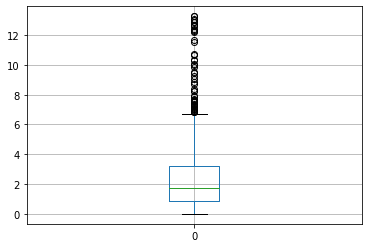

In [11]:
df = pd.DataFrame(np.array(error_list).reshape(-1))
df.plot.box(grid='True')